In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier, DMatrix
from pandas_profiling.utils.cache import cache_file
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

plt.style.use('ggplot')

In [101]:
df = pd.read_csv('../data/Crop_recommendation.csv')
df.info()
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [102]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [103]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [104]:
df['label'].value_counts()


kidneybeans    100
grapes         100
maize          100
mango          100
banana         100
rice           100
pomegranate    100
mothbeans      100
orange         100
lentil         100
chickpea       100
watermelon     100
muskmelon      100
cotton         100
pigeonpeas     100
coffee         100
apple          100
papaya         100
blackgram      100
jute           100
mungbean       100
coconut        100
Name: label, dtype: int64

In [105]:
df['label'].nunique()

22

<AxesSubplot:xlabel='label', ylabel='count'>

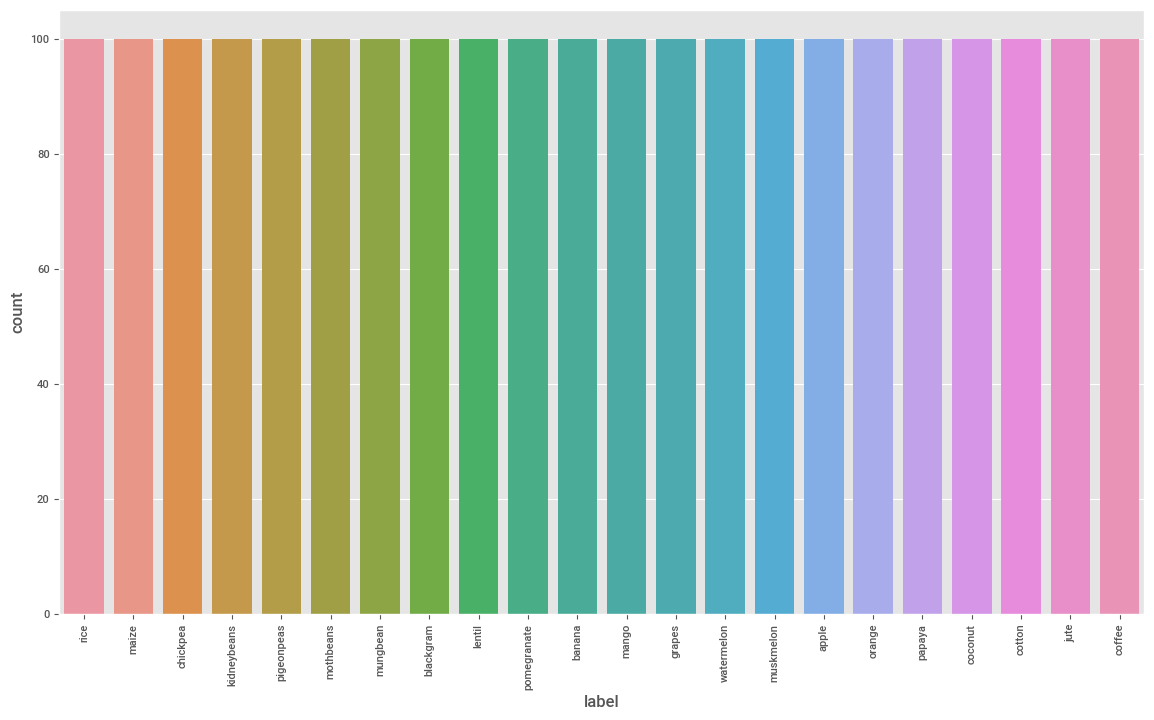

In [106]:
#Checking balance of classes
fig = plt.figure(figsize=(14, 8))
plt.xticks(rotation='vertical')
sns.countplot(df['label'])

In [107]:
profile = ProfileReport(
    df, explorative=True, title="Crop suggestions", html={"style": {"full_width": True}}, sort=None
)
profile.config.variables.descriptions = {
    "N": "Ratio of Nitrogen content in soil",
    "P": "Ratio of Phosphorous content in soil",
    "K": "Ratio of Potassium content in soil",
    "temperature": "Temperature in degree Celsius",
    "humidity": "Relative humidity in %",
    "ph": "ph value of the soil",
    "rainfall": "rainfall in mm",
}

profile.to_file("crop-eda.html")


Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Shape of your Data Set: (2200, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 2200 rows, 7 cols
Data Set columns info:
* N: 0 nulls, 137 unique vals, most common: {40: 44, 22: 44}
* P: 0 nulls, 117 unique vals, most common: {60: 56, 58: 48}
* K: 0 nulls, 73 unique vals, most common: {17: 90, 22: 87}
* temperature: 0 nulls, 2200 unique vals, most common: {28.48444906: 1, 28.88078945: 1}
* humidity: 0 nulls, 2200 unique vals, most common: {34.13307843: 1, 90.59810302: 1}
* ph: 0 nulls, 2200 unique vals, most common: {5.940546818: 1, 6.376756632999999: 1}
* rainfall: 0 nulls, 2200 unique vals, most common: {162.5931264: 1, 53.12442925: 1}
--------------------------------------------------------------------
    Numeric Columns: ['temperature', 'humidity', 'ph', 'rainfall']
    Integer-Categorical Columns: ['N', 'P', 'K']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boo

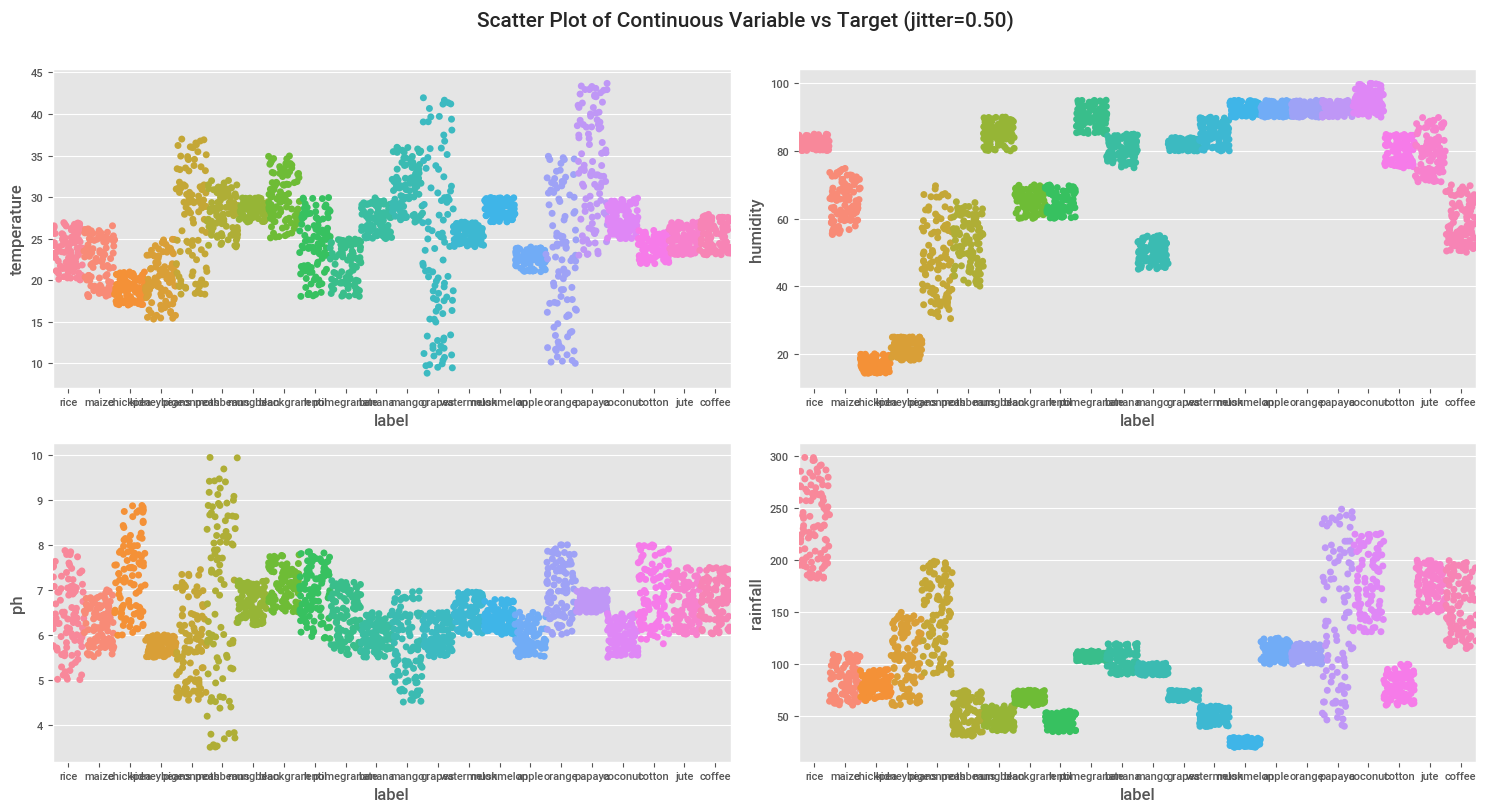

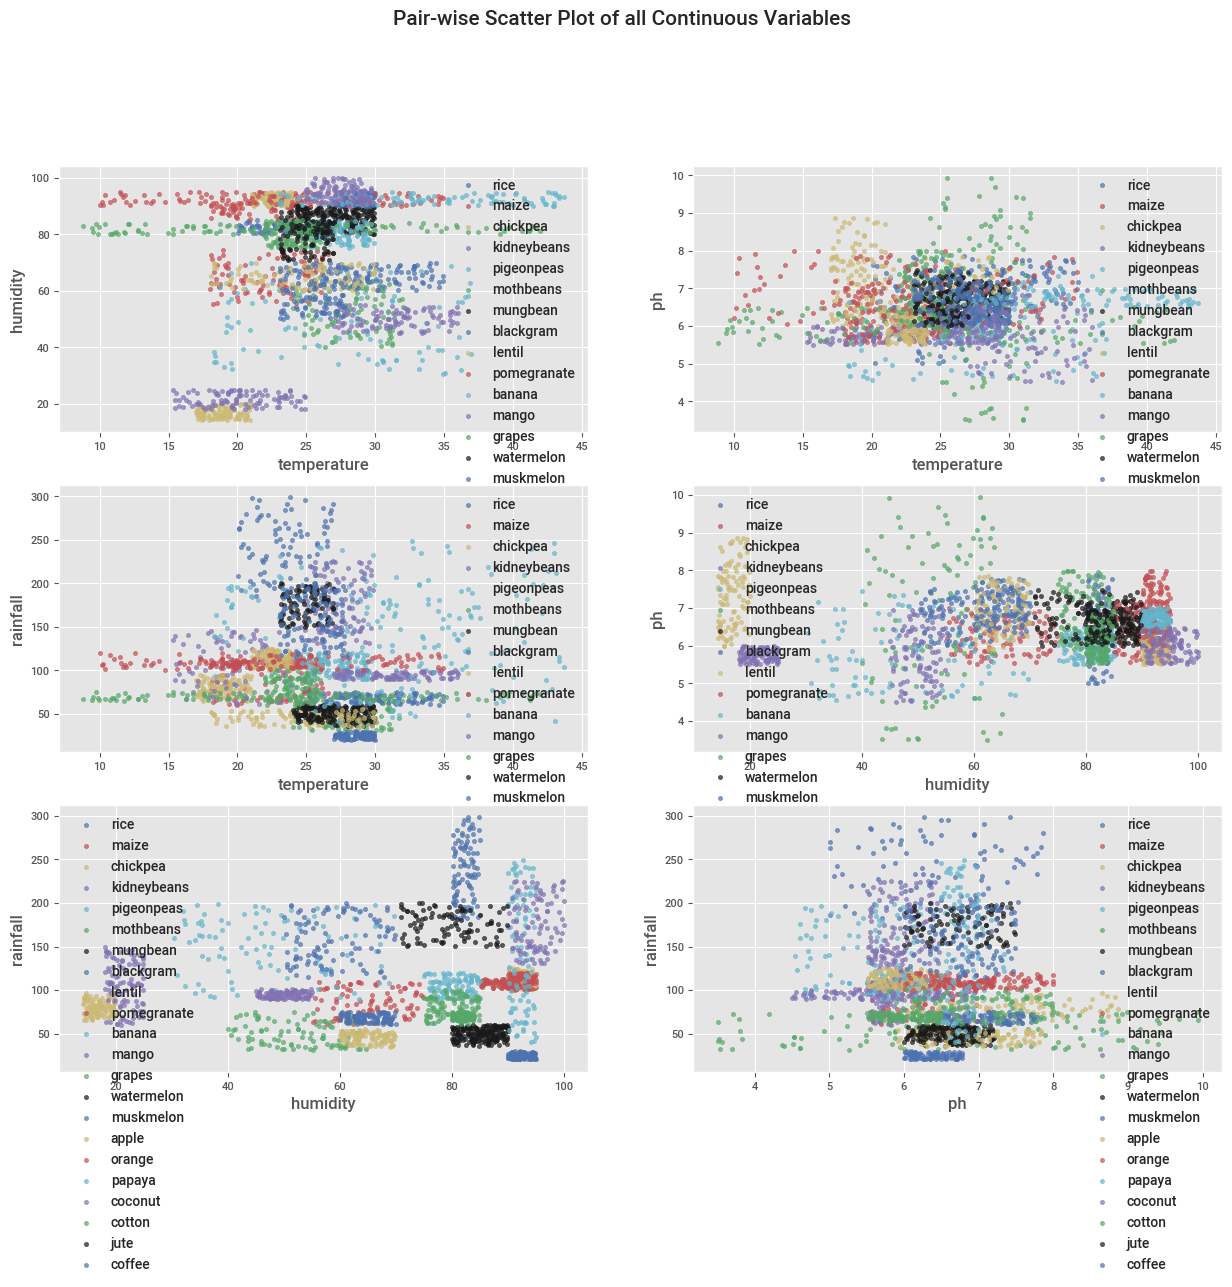

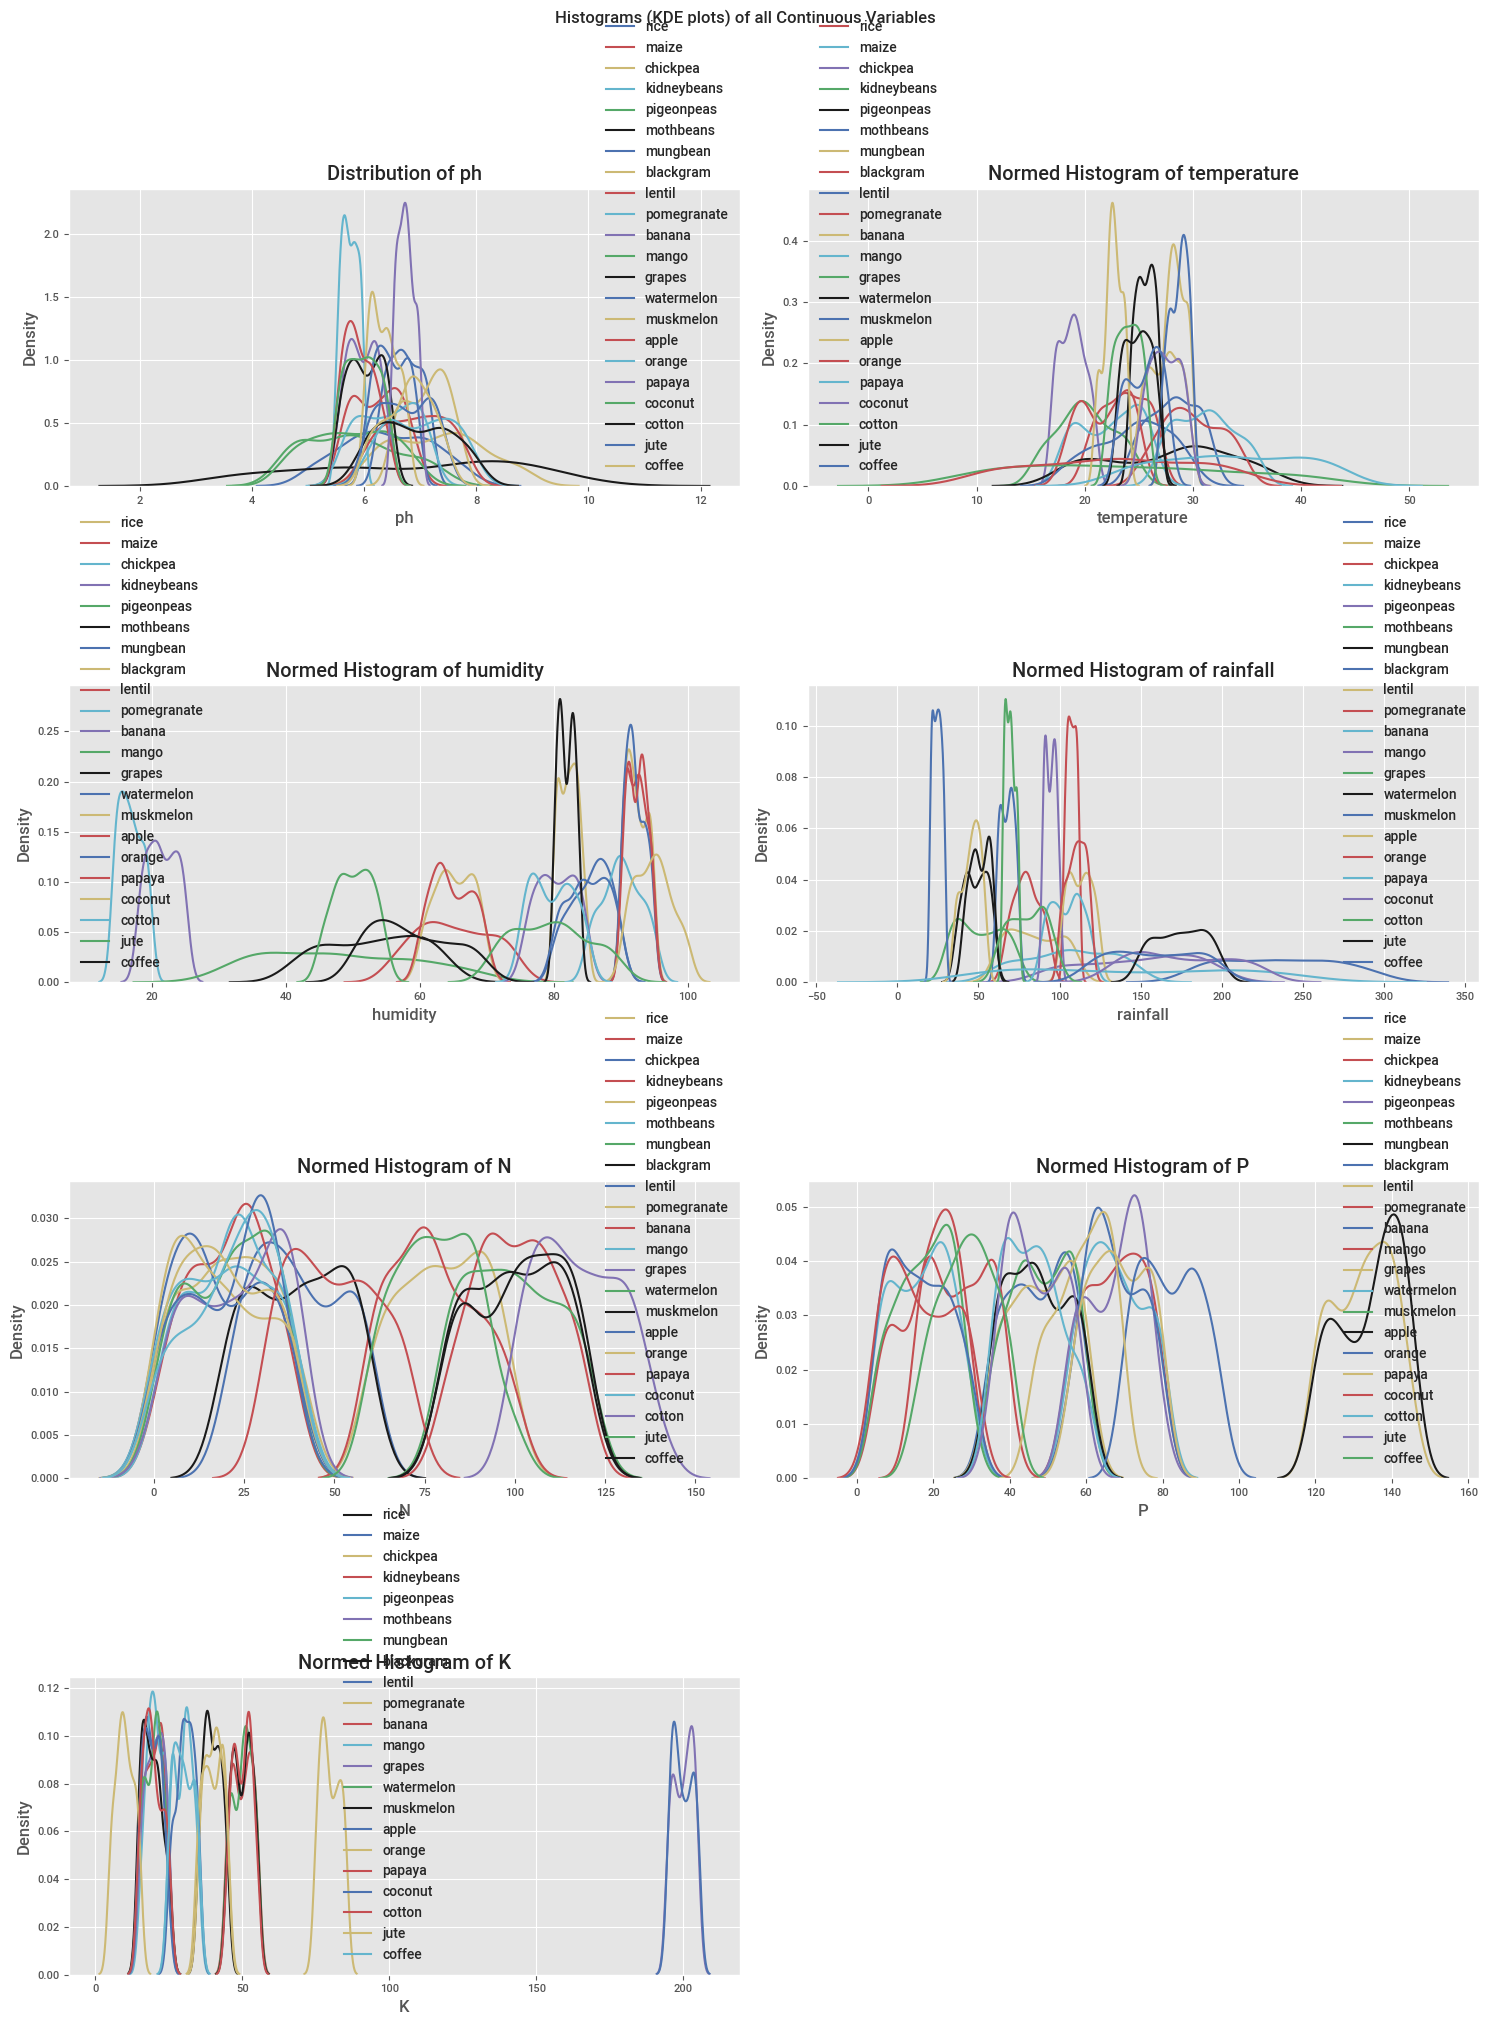

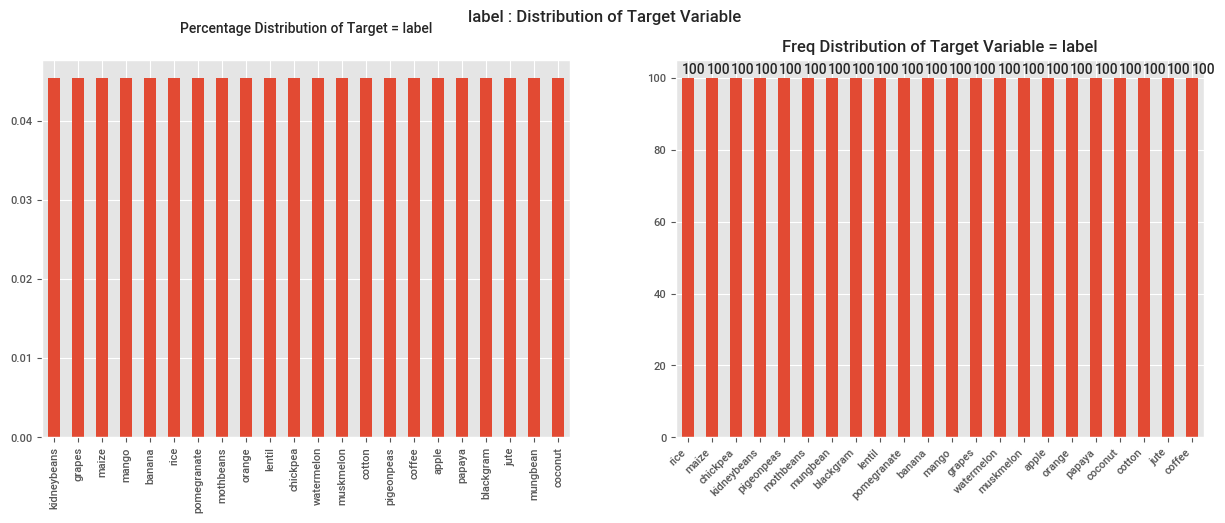

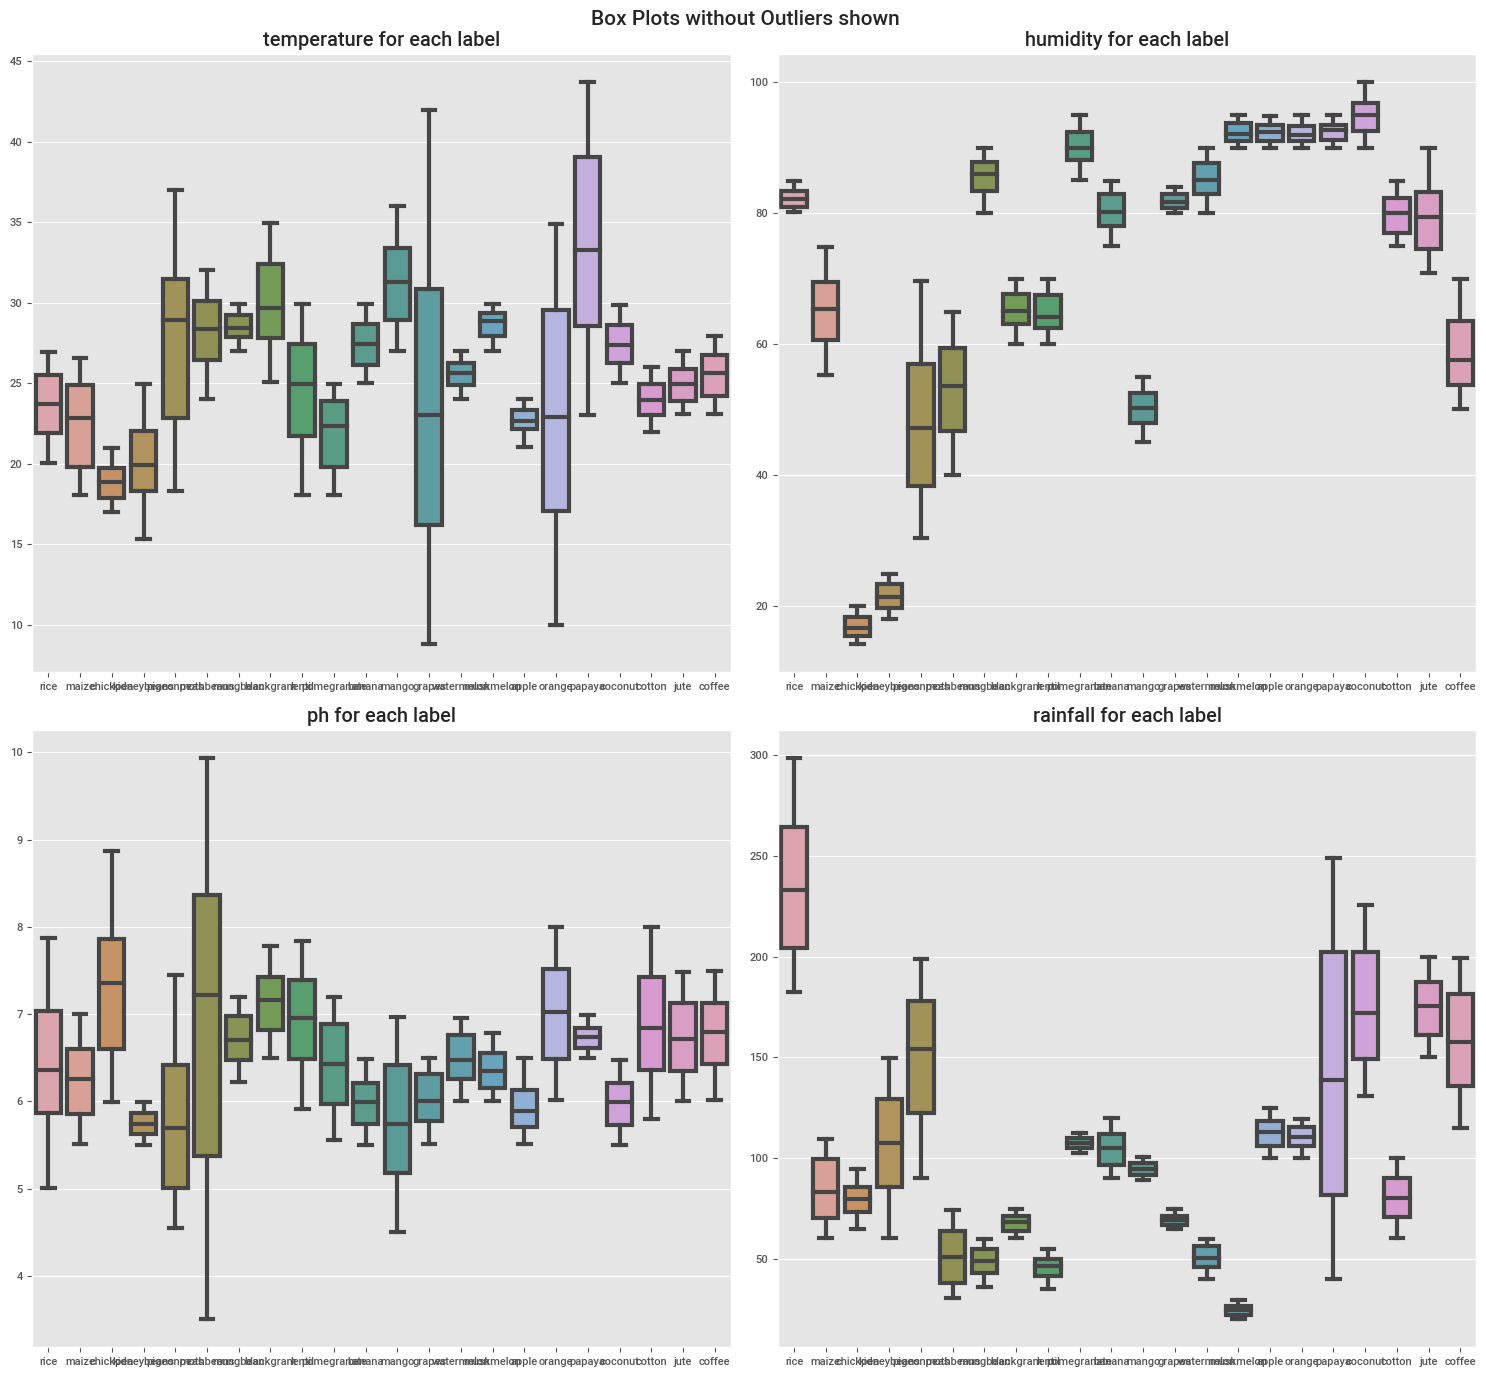

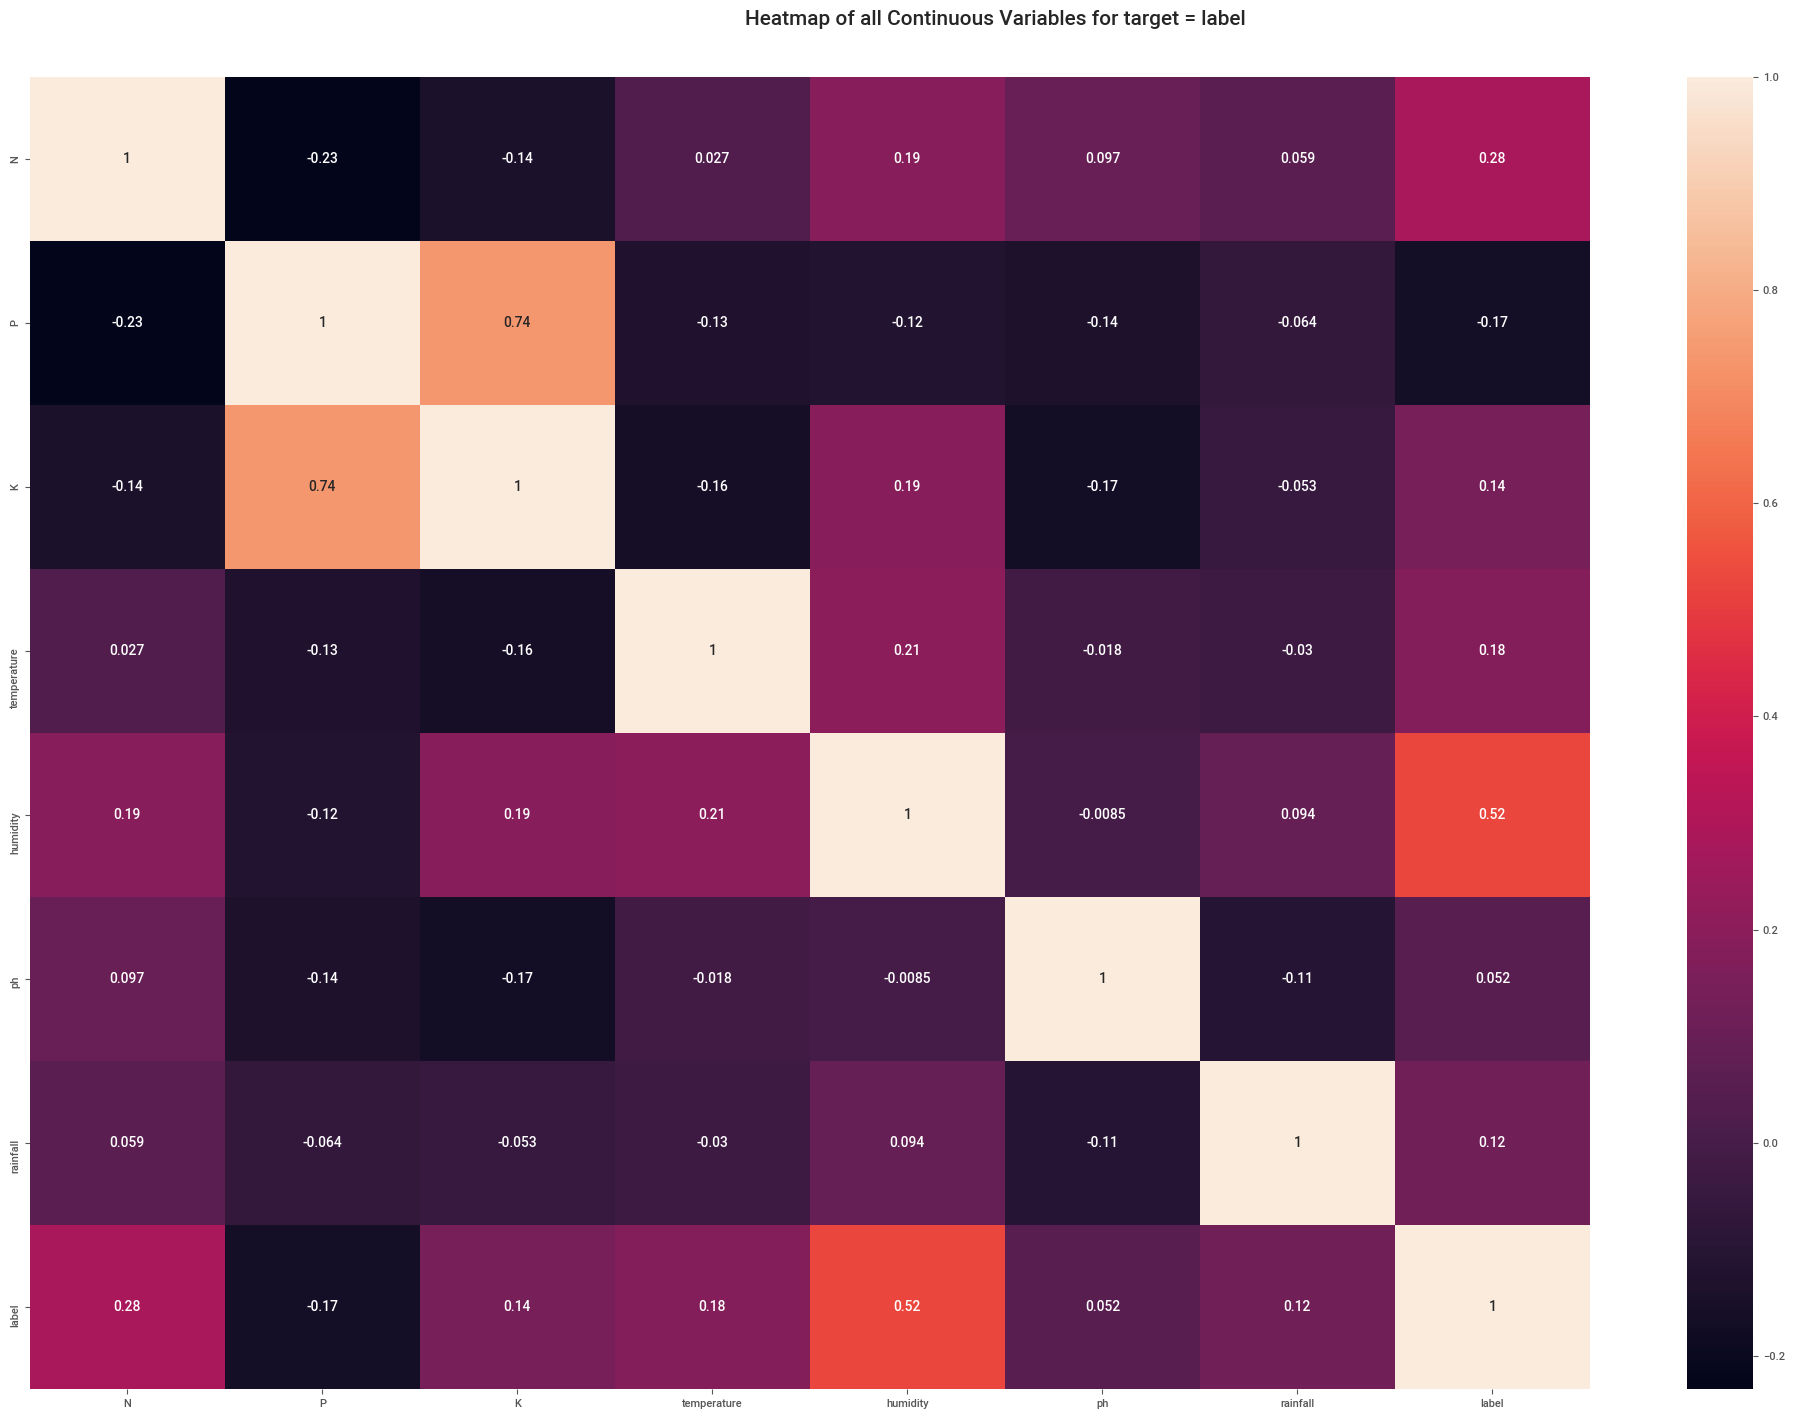

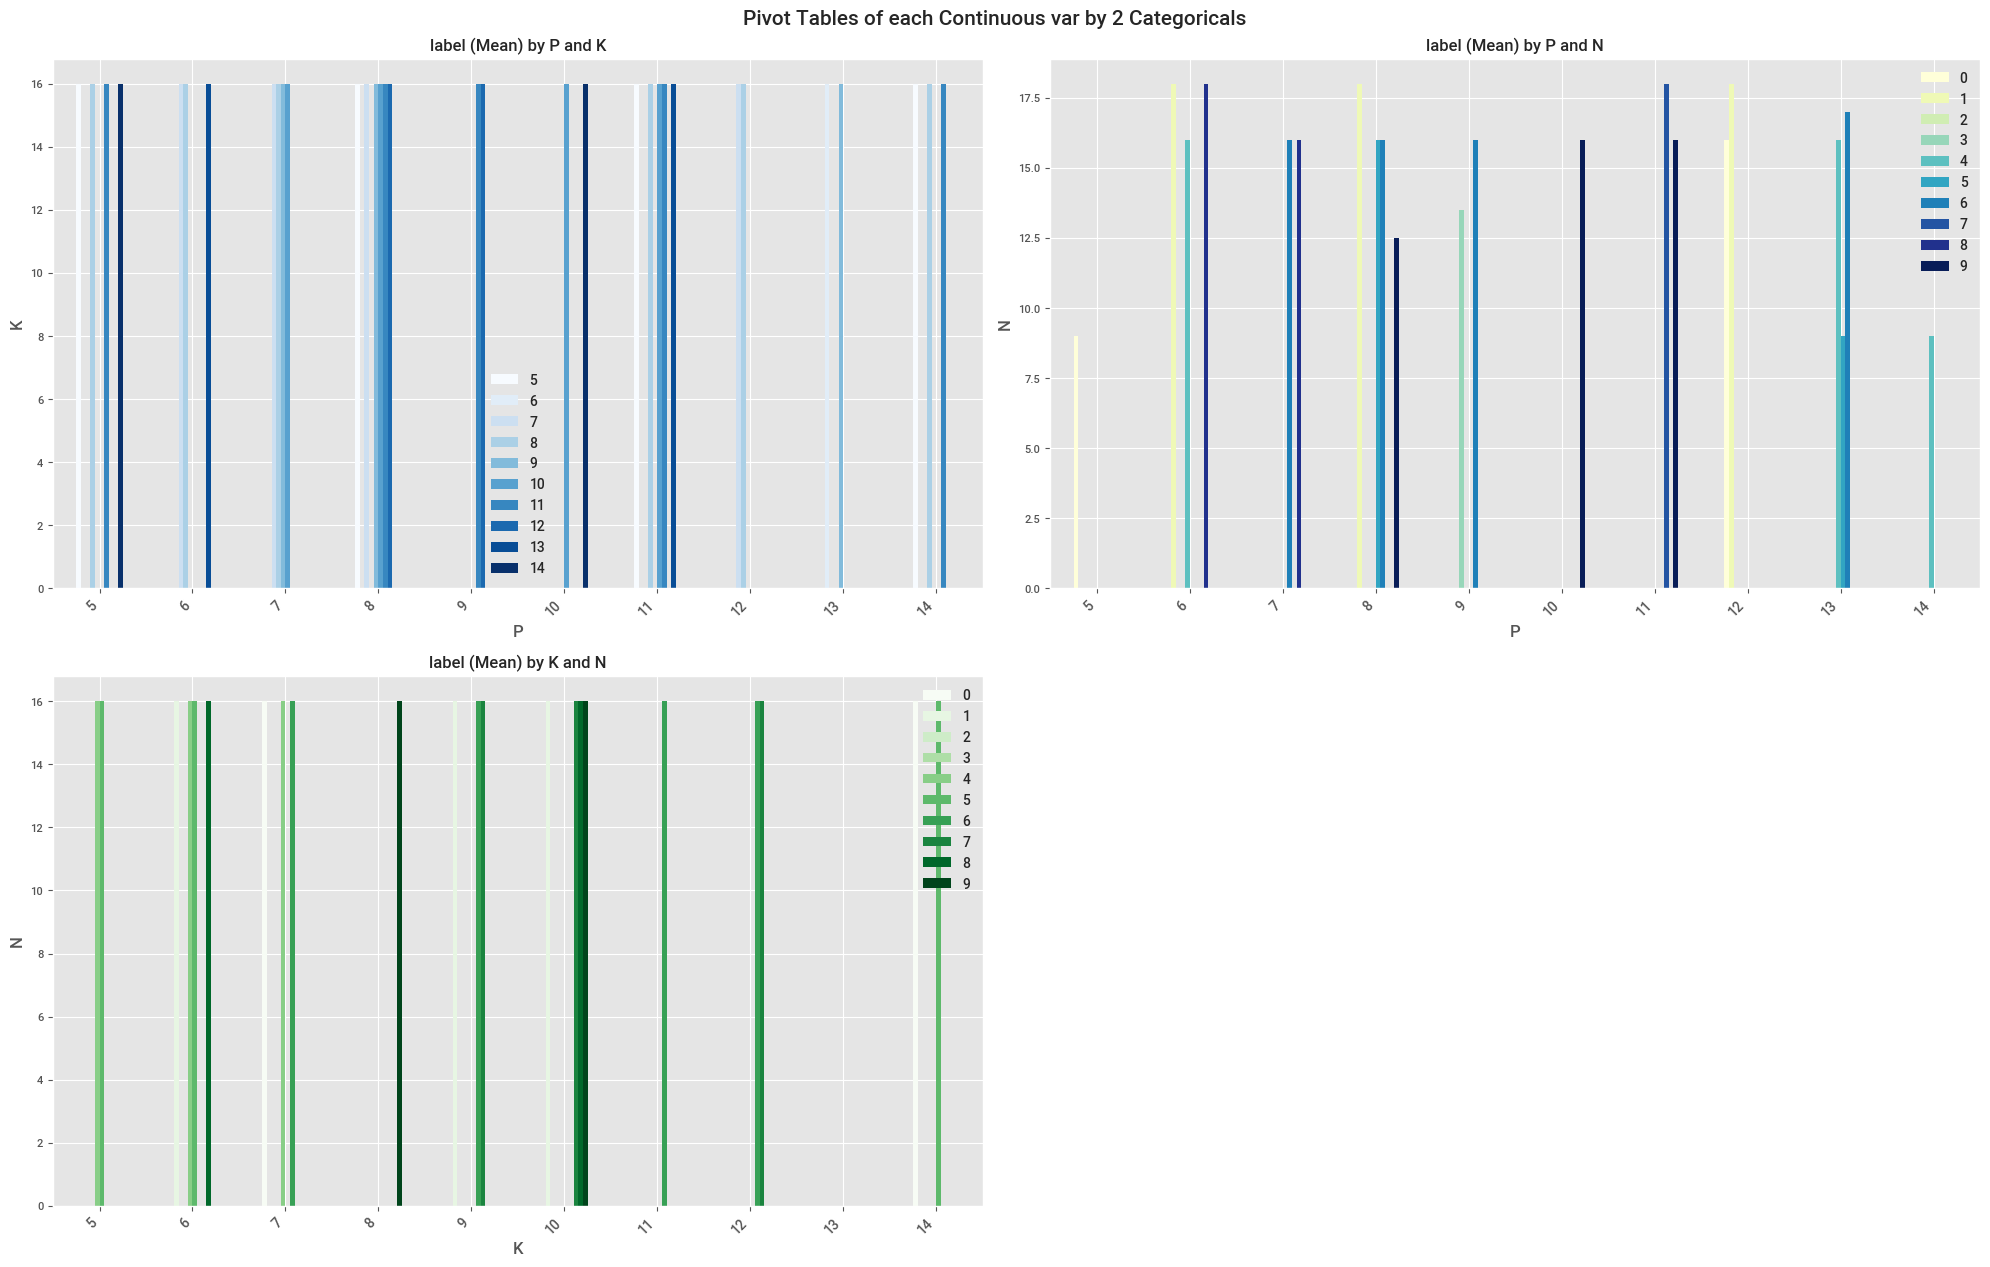

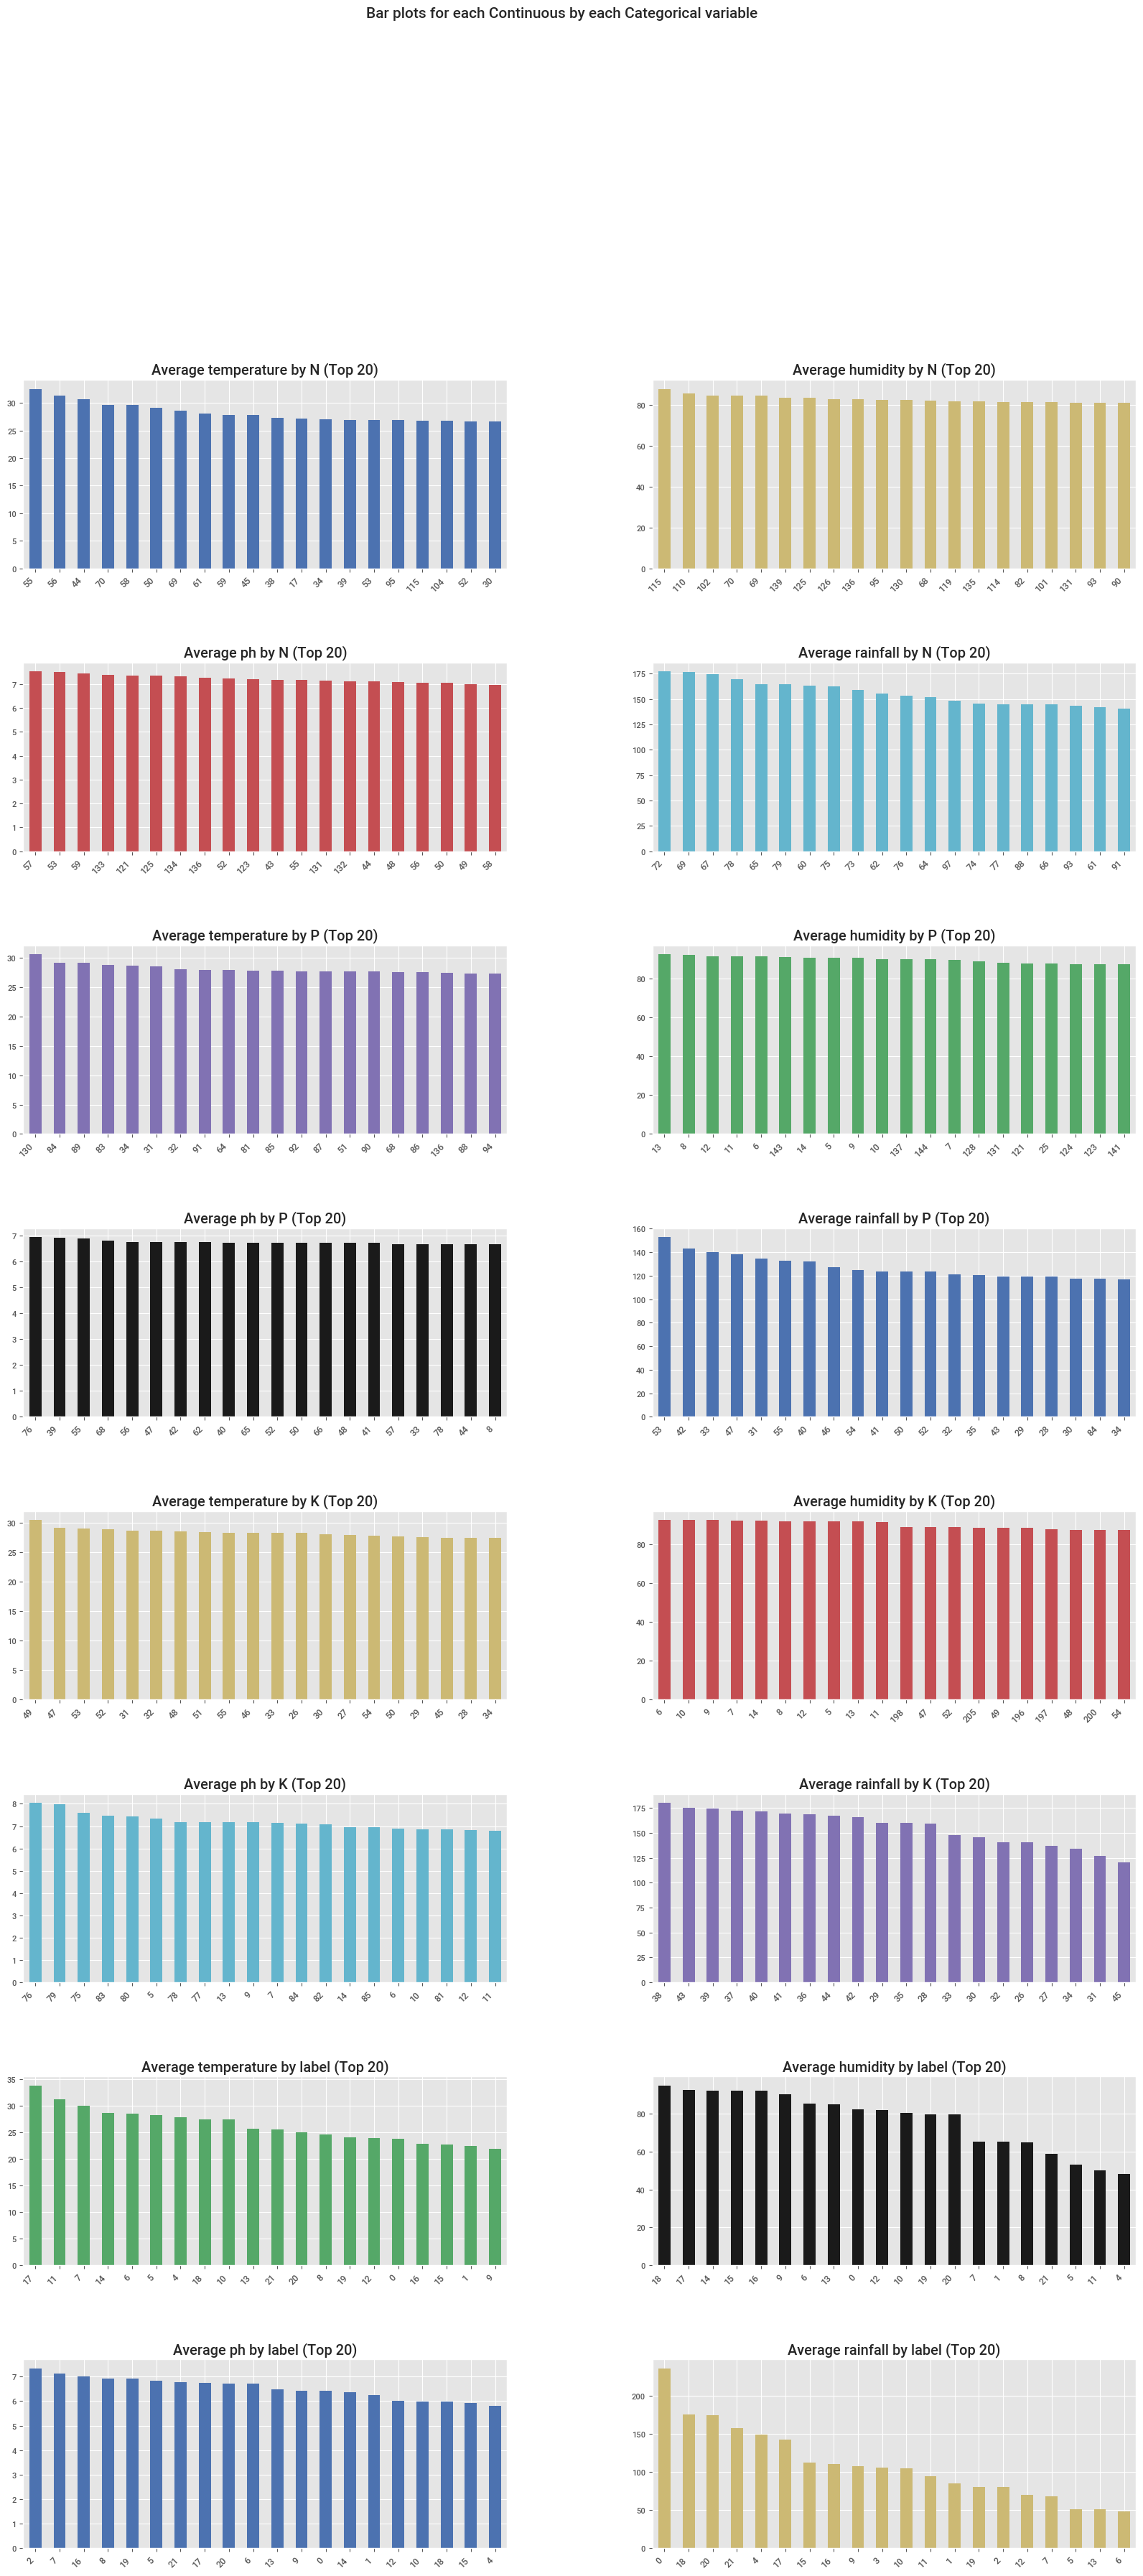

In [108]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
filename = ""
sep = ","

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="label",
    dfte=df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)